In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os
import warnings
import nltk
import string
import collections
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from textblob import TextBlob,Word,Blobber

nltk.download('stopwords')
warnings.filterwarnings('ignore')
filepath = os.path.join(os.getcwd(),'CSV_Files','ninja_reports.xls')
df = pd.read_excel('ninja_reports2.xls',sheet_name='ninja_reports')

df_w = pd.read_csv("ward_details.csv")

[nltk_data] Downloading package stopwords to /home/shriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
city_number = []
blor = ["chennai"] #['bangalore', 'Bangalore', 'bengaluru', 'Bengaluru', 'BANGALORE', 'BENGALURU']
i = 0
for city in df.location:
    #print(str(city))
    if "chennai" in str(df.location[i]).lower():
        city_number.insert(i, 2)
    elif "Tamil Nadu" in str(df.location[i]):
        city_number.insert(i, 2)
    elif "Andhra Pradesh" in str(df.location[i]):
        city_number.insert(i, 4)
    elif "hosur" in str(df.location[i]).lower():
        city_number.insert(i,3)
    elif "bangalore" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "bengaluru" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "560023" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "uttarahalli" in str(df.location[i]).lower():
        city_number.insert(i,1)
    else:
        city_number.insert(i,0)
    i += 1
df['city_number'] = city_number

k = 0
for i in df.location:
        if "chikkajala" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "nagegowdanapalya" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562157" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562129" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "Behind government automobile workshop bangalore" in str(df.landmark[k]):
            df.city_number[k] = 0
        if "562125" in str(df.location[k]).lower() or "562123" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "madanayakahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "thammenahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "poppat jamals" in str(df.landmark[k]).lower() or "mandaveli" in str(df.landmark[k]).lower() or "perundurai" in str(df.landmark[k]).lower():
            df.city_number[k] = 2
        k += 1


k = 0
count = 0
for n in df.city_number:
    if n == 1:
        #print(df.location[k])
        count += 1
    k += 1
print(count)

2960


In [3]:
k = 0
count = 0
count2 = 0
for i in df.city_number:
    if i == 1:
        if df.ward_id[k] <= 0 or df.ward_id[k] > 198:
           # print(df.location[k])
            count += 1
        if df.ward_id[k] >=1 and df.ward_id[k] <= 198:
            count2 += 1
    k += 1
print(count)
print(count2)


125
2835


In [4]:
k = 0
for i in df.city_number:
    if i == 1:
        if df.ward_id[k] <= 0 or df.ward_id[k] > 198:
            print(df.location[k])
    k += 1

bangalore
59, West Anjaneya Temple Street, Gandhi Bazaar Main Rd, Gandhi Bazaar, Basavanagudi, Bengaluru, Karnataka 560004, India
59, West Anjaneya Temple Street, Gandhi Bazaar Main Rd, Gandhi Bazaar, Basavanagudi, Bengaluru, Karnataka 560004, India
119/36, 33rd Cross Rd, 4th Block, Jayanagar, Bengaluru, Karnataka 560011, India
682, Outer Ring Rd, Jeewan Griha Colony, 2nd Phase, J. P. Nagar, Bengaluru, Karnataka 560078, India
JP Nagara 4th Phase, Jeewan Griha Colony, 2nd Phase, J. P. Nagar, Bengaluru, Karnataka 560078, India
#578,21st Main,35th Cross,4th ‘T’ Block,Jayanagar, Bengaluru, Karnataka 560041, India
Jayanagar 4Th Block, 4th T Block East, 4th Block, Jayanagar, Bengaluru, Karnataka 560011, India
9th Main Rd, 4th T Block East, 4th Block, Jayanagar, Bengaluru, Karnataka 560011, India
189, 5th Main Rd, 4th Block, Jayanagar, Bengaluru, Karnataka 560011, India
Jayanagar, 4th Block, Jayanagar, Bengaluru, Karnataka 560041, India
77, Vanivilas Rd, Gandhi Bazaar, Basavanagudi, Bengaluru

In [5]:
k = 0
count = 0
count2 = 0
for i in df.city_number:
    if i == 1:
        if "gandhi bazaar" in str(df.location[k]).lower():
            df.ward_id[k] = 142
        if "2nd Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "1st Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "4th ‘T’ Block,Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "4th T Block East" in str(df.location[k]):
            df.ward_id[k] = 168
        if "Hullahalli" in str(df.location[k]):
            df.ward_id[k] = 192
        if "4th Block, Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "560004" in str(df.location[k]):
            df.ward_id[k] = 142
        if "Subramanyapura" in str(df.location[k]):
            df.ward_id[k] = 184
        if "BTM Layout" in str(df.location[k]):
            #print(df.location[k], df.ward_id[k])
            df.ward_id[k] = 188
        if "Shanthala Nagar" in str(df.location[k]):
            df.ward_id[k] = 111
        if "High Grounds" in str(df.location[k]):
            df.ward_id[k] = 93
        if "560062" in str(df.location[k]):
            df.ward_id[k] = 196
        if "Electronic City" in str(df.location[k]):
            df.ward_id[k] = 192
        if "Cheemasandra" in str(df.location[k]) or "Budigere Rd" in str(df.location[k]):
            df.ward_id[k] = 54
        if "1st Stage, Kumaraswamy Layout" in str(df.location[k]):
            df.ward_id[k] = 181
        if "Kannamangala" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Pipelineroadvijayanagarbangalore560023" in str(df.location[k]):
            df.ward_id[k] = 124
        if "Doddakannelli" in str(df.location[k]):
            df.ward_id[k]= 150
            
        if "BTM 2nd Stage" in str(df.location[k]):
            df.ward_id[k] = 188
        if "Seegehalli" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Indiranagar" in str(df.location[k]):
            df.ward_id[k] = 80
        if "Kengeri Satellite Town, Bengaluru" in str(df.location[k]):
            df.ward_id[k] = 159
        if "Armane Nagar" in str(df.location[k]):
            df.ward_id[k] = 35
        if "RT Nagar" in str(df.location[k]):
            df.ward_id[k] = 33
        if "Chamundi Nagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Ganganagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Bairasandra Main Rd" in str(df.location[k]):
            df.ward_id[k] = 58
        if "RR Nagar" in str(df.location[k]):
            df.ward_id[k] = 160
        if "Avalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "HSR Layout" in str(df.location[k]):
            df.ward_id[k] = 174
        if "Hoskote Rd" in str(df.location[k]):
            df.ward_id[k] = 83
        if "MET Layout" in str(df.location[k]):
            df.ward_id[k] = 18
        if "Aavalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "Kempapura" in str(df.location[k]):
            df.ward_id[k] = 7
        if "Arekere" in str(df.location[k]):
            df.ward_id[k] = 193
        if "Nagavara" in str(df.location[k]):
            df.ward_id[k] = 6
        if "560077" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Krishnarajapura" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Nagondanahalli" in str(df.location[k]):
            df.ward_id[k] = 84
        if "Gollarahatti" in str(df.location[k]):
            df.ward_id[k] = 130  
            
   
        #doubtful of vakil
        if "Vakil Garden" in str(df.location[k]):
            df.ward_id[k] = 198
        if "Shobha Hills View Apartment" in str(df.location[k]):
            df.ward_id[k] = 198
        
    k += 1
print(count)

0


In [6]:
k = 0
count = 0
for i in df.ward_id:
    if i == 142:
       # print(df.location[k])
        count += 1
    k += 1
print(count)

131


In [7]:
k = 0
count = 0
count2 = 0
for i in df.city_number:
    if i == 1:
        if df.ward_id[k] <= 0 or df.ward_id[k] > 198:
            print(df.landmark[k], df.location[k])
            count += 1
        if df.ward_id[k] >=1 and df.ward_id[k] <= 198:
            count2 += 1
    k += 1
print(count)
print(count2)

Behind government automobile workshop bangalore
1
2959


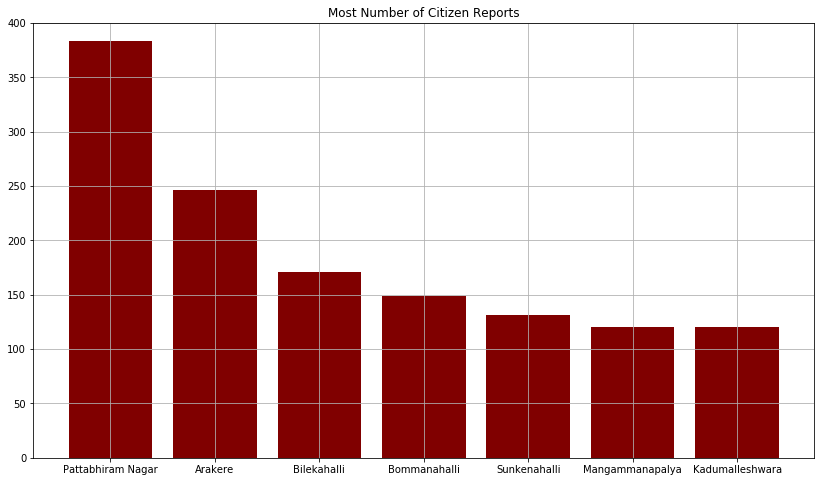

In [8]:
for i in range(3000,4000):
    print(df.description[i]+ ' ,neg')

Stones , rocks and other unwanted things are thrown in public places ,neg
Hi!this a proplem that happens when it rain this cause due to unproper constructing of rain water collecting ,neg
Drainage are cleaned and the waste are left  ,neg
There is a drainage open in residential area
 ,neg
There is a garbage and which is not that maintained properly which makes terrible stink this makes readymade home for rats and other insects which live in the garbage ,neg
garbage is not cleaned properly  ,neg
the garbage is not cleaned properly ,neg
Garbage laid around the water pump ,neg
Pothole to be fixed for a week ,neg
Garbage is dumped here.
Even animals are eating it ,neg
Garbage is dumped here ,neg
It is very stinky ,neg
It is in the turning of the road. It is very disturbing. ,neg
The stray dogs get disease ,neg
Not closed the pit properly in road turning ,neg
It is a very disturbing factor and the animal eats the garbage. It also produces foul smell. ,neg
We don't have place to park ,neg
It 